In [128]:
import matplotlib.pyplot as plt
import mplleaflet as mpl
import pandas as pd
import numpy as np

In [13]:
df = pd.read_csv("datasets/go_trackspoints.csv")

In [15]:
df.head()

,id,latitude,longitude,track_id,time
0,1,-10.939341,-37.062742,1,2014-09-13 07:24:32
1,2,-10.939341,-37.062742,1,2014-09-13 07:24:37
2,3,-10.939324,-37.062765,1,2014-09-13 07:24:42
3,4,-10.939211,-37.062843,1,2014-09-13 07:24:47
4,5,-10.938939,-37.062879,1,2014-09-13 07:24:53


##  1. Find trend of speed over time

In [17]:
# First thing we need is a function which calculates distances betweeen 2 coordinates

def find_distance(lat1, long1, lat2, long2):
    
    DOF_lat = lat1 - lat2
    DOF_long = long1 - long2
    
    dist_lat = DOF_lat * 111139
    dist_long = DOF_long * 111139
    
    dist = np.sqrt((dist_lat*dist_lat) + (dist_long*dist_long))
    
    return dist

In [19]:
# Lets select one trip
df["track_id"].unique()

array([    1,     2,     3,     4,     8,    10,    11,    12,    13,
          14,    16,    17,    18,    19,    20,    21,    22,    23,
          24,    25,    26,    27,    28,    30,    31,    33,    34,
          35,    36,    37,    38,    39,    40,    41,    42,    43,
          44,    45,    46,    47,    48,    49,    50,    51,    54,
          55,    56,    58,    61,    63,    65,    67,    70,    71,
          78,    99,   128,   131,   132,   133,   134,   135,   136,
         137,   138,   139,   140,   141,   142,   143,   145,   146,
         147,   148,   149,   150,   151,   153,   155,   156,   157,
         158,   159,   171,   173,   177,   179,   180,   190,   205,
         206,   207,   208,   209,   210,   248, 32446, 32447, 37945,
       37949, 37951, 37950, 37953, 37954, 37955, 37956, 37957, 37960,
       37961, 37962, 37964, 37965, 37967, 37969, 37971, 37972, 37973,
       37979, 37982, 37983, 37989, 37990, 37992, 37993, 37995, 37996,
       37997, 37998,

In [81]:
trip = 1
trip_filter = df["track_id"] == 2
df_trip = df[trip_filter]
df_trip.head()

,id,latitude,longitude,track_id,time
90,91,-10.939439,-37.062428,2,2014-09-13 13:37:54
91,92,-10.939442,-37.062570,2,2014-09-13 13:37:59
92,93,-10.939442,-37.062570,2,2014-09-13 13:38:05
93,94,-10.939442,-37.062570,2,2014-09-13 13:38:11
94,95,-10.938994,-37.062804,2,2014-09-13 13:38:17


In [33]:
# Find total duration of trip
from dateutil import parser

In [97]:
df_len = len(df_trip) - 1
start = parser.parse(df_trip["time"].iloc[0])
end = parser.parse(df_trip["time"].iloc[df_len])

time_delta = end - start
total_time = time_delta.total_seconds()

In [99]:
total_time

613.0

In [133]:
# Function to find time between two points:

def find_time(df_trip, loc1, loc2):
    
    start = parser.parse(df_trip["time"].iloc[loc1])
    end = parser.parse(df_trip["time"].iloc[loc2])
    time_delta = end - start
    seconds = time_delta.total_seconds()
    
    return seconds
    
    

In [157]:
df_speed = pd.DataFrame(columns=["speed", "time"])

df_len = len(df_trip) - 1
total_time = 0

for i in range(df_len):
    
    time = find_time(df_trip, i, i+1)
    distance = find_distance(df_trip["latitude"].iloc[i], df_trip["longitude"].iloc[i], df_trip["latitude"].iloc[i+1], df_trip["longitude"].iloc[i+1])
    speed = (distance/time) * (18/5)
    total_time = total_time  + (time/60)
    df_speed = df_speed.append({"speed":speed, "time" : total_time}, ignore_index = True)

In [158]:
df_speed.head()

,speed,time
0,11.328519,0.083333
1,0.000000,0.183333
2,0.000000,0.283333
3,33.725846,0.383333
4,33.805915,0.466667


In [159]:
df_speed.describe()

,speed,time
count,112.000000,112.000000
mean,32.725282,5.167708
std,23.387446,2.963860
min,0.000000,0.083333
25%,13.670170,2.645833
50%,28.470557,5.150000
75%,50.008543,7.720833
max,87.599129,10.216667


**No outliers or invalid values**

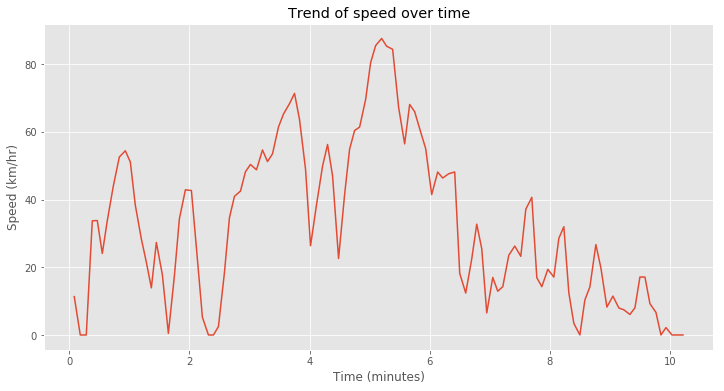

In [165]:
x = np.arange(0,112)
ticks = np.arange(0,112,50)
plt.figure(figsize=(12,6))
plt.title("Trend of speed over time")
plt.style.use("ggplot")
plt.plot(df_speed["time"], df_speed["speed"])
plt.xlabel("Time (minutes)")
plt.ylabel("Speed (km/hr)")
plt.show()

**Here we can get an overview of speed of the car over the duration of the whole trip. We can see at which time the driver overspeed, stopped etc.**